In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from pylab import rcParams
rcParams['figure.figsize']= 14,8
random_seed=42
LABELS=["Present","not present"] 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('geelongbuiltenv with Geographic location (1).csv')
df.head()

,LUM,LUMquintile,TrainDistThresh,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,SprtLeiDens,...,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile,Latitude,Longitude,TrainPres
0,0.418636,4,0,1,1,2,2,2,2,0.000000,...,4,0.419933,2,775.371825,3,0.063443,2,-38.1567,144.5551,0
1,0.512726,4,1,1,1,7,5,7,5,0.000000,...,1,2.996704,4,315.721995,1,0.025997,1,-38.1333,144.3500,0
2,0.209689,2,0,1,1,5,3,4,4,0.020258,...,2,2.670940,4,746.243079,2,0.135687,3,-38.1700,144.3960,0
3,0.847546,5,1,1,1,7,5,7,5,0.037318,...,1,9.479434,5,316.179185,1,0.172038,3,-38.1674,144.3658,1
4,0.307938,3,0,1,1,3,2,4,3,0.000000,...,1,0.329327,2,669.341899,2,0.157551,3,-38.1200,144.3200,0


In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 40 columns):
LUM                           46 non-null float64
LUMquintile                   46 non-null int64
TrainDistThresh               46 non-null int64
BusDistThresh                 46 non-null int64
BusPres                       46 non-null int64
AccUtDestPres                 46 non-null int64
AccUtDestPresquintile         46 non-null int64
AccUtDestDist                 46 non-null int64
AccUtDestDistquintile         46 non-null int64
SprtLeiDens                   46 non-null float64
SprtLeiDensquintile           46 non-null int64
SprtLeiDist                   46 non-null float64
SprtLeiDistquintile           46 non-null int64
POSDist                       46 non-null float64
POSDistquintile               46 non-null int64
POSAreaPct                    46 non-null float64
POSAreaPctquintile            46 non-null int64
TakeawayDens                  46 non-null float64
TakeawayDensquintile 

In [0]:
#creating dependent and independent attributes
columns=df.columns.tolist()
columns=[c for c in columns if c not in ['TrainPres']]
target='TrainPres'
state=np.random.RandomState(42)
x=df[columns]
y=df[target]
x_outliers=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(46, 39)
(46,)


In [0]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

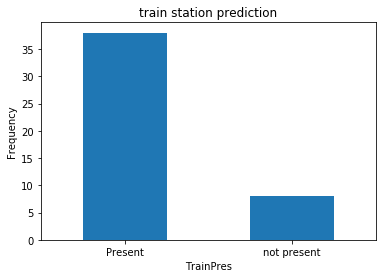

In [0]:
count_TrainPres=pd.value_counts(df['TrainPres'],sort =True)
count_TrainPres.plot(kind='bar',rot=0)
plt.title('train station prediction')
plt.xticks(range(2),LABELS)
plt.xlabel('TrainPres')
plt.ylabel('Frequency')


In [0]:
notpresent=df[df['TrainPres']==0]
present=df[df['TrainPres']==1]
print(notpresent.shape,present.shape)

(38, 40) (8, 40)


In [0]:
from imblearn.combine import SMOTETomek


Using TensorFlow backend.


In [0]:
##oversampling
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)
x_res.shape,y_res.shape


((68, 39), (68,))

In [0]:
from collections import Counter
print('orginal dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_res)))

orginal dataset shapeCounter({0: 38, 1: 8})
resampled dataset shapeCounter({0: 34, 1: 34})


In [0]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_train_res,y_train_res=os.fit_sample(x,y)
x_train_res.shape,y_train_res.shape

((76, 39), (76,))

In [0]:
print(x_train_res)



         LUM  LUMquintile  TrainDistThresh  BusDistThresh  BusPres  \
0   0.418636            4                0              1        1   
1   0.512726            4                1              1        1   
2   0.209689            2                0              1        1   
3   0.847546            5                1              1        1   
4   0.307938            3                0              1        1   
..       ...          ...              ...            ...      ...   
71  0.847546            5                1              1        1   
72  0.503964            4                0              1        1   
73  0.533334            5                1              1        1   
74  0.205386            2                1              0        1   
75  0.205386            2                1              0        1   

    AccUtDestPres  AccUtDestPresquintile  AccUtDestDist  \
0               2                      2              2   
1               7                      5 

In [0]:
print(y_train_res)

0     0
1     0
2     0
3     1
4     0
     ..
71    1
72    1
73    1
74    1
75    1
Name: TrainPres, Length: 76, dtype: int64


In [0]:
X_train_res_df = pd.DataFrame(x_train_res,columns=x.columns)

In [0]:
print('orginal dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_train_res)))

orginal dataset shapeCounter({0: 38, 1: 8})
resampled dataset shapeCounter({0: 38, 1: 38})


In [0]:
X_train_res_df.head()

,LUM,LUMquintile,TrainDistThresh,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,SprtLeiDens,...,ActCenDist,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile,Latitude,Longitude
0,0.418636,4,0,1,1,2,2,2,2,0.000000,...,21768.170070,4,0.419933,2,775.371825,3,0.063443,2,-38.1567,144.5551
1,0.512726,4,1,1,1,7,5,7,5,0.000000,...,1812.155338,1,2.996704,4,315.721995,1,0.025997,1,-38.1333,144.3500
2,0.209689,2,0,1,1,5,3,4,4,0.020258,...,5267.718643,2,2.670940,4,746.243079,2,0.135687,3,-38.1700,144.3960
3,0.847546,5,1,1,1,7,5,7,5,0.037318,...,1663.495404,1,9.479434,5,316.179185,1,0.172038,3,-38.1674,144.3658
4,0.307938,3,0,1,1,3,2,4,3,0.000000,...,4325.191244,1,0.329327,2,669.341899,2,0.157551,3,-38.1200,144.3200


76
[1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.881578947368421
Confusion Matrix :
[[33  0]
 [ 0 43]]
Accuracy Score :
1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        43

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

Confusion matrix, without normalization
SCATTER PLOT


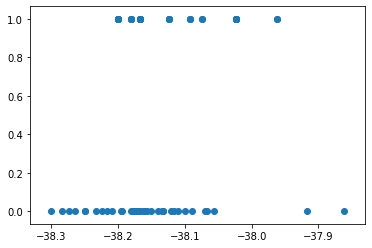

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
knn = KNeighborsClassifier()
knn.fit(x_train_res,y_train_res)
#Train the model using the training sets
knn.predict(X_train_res_df)
knn.score(x_train_res,y_train_res)
actual = knn.predict(x_train_res) 
predicted = knn.predict(X_train_res_df) 
print(len(predicted))
results = confusion_matrix(actual, predicted) 
print(knn.predict(X_train_res_df))  
print(knn.score(x_train_res,y_train_res))
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))
print(title)
print('SCATTER PLOT')
plt.scatter(x_train_res.iloc[:,37],y_train_res)
plt.show()

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1]
0.6842105263157895
Confusion Matrix :
[[26  0]
 [ 0 50]]
Accuracy Score :
1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        50

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

Confusion matrix, without normalization
SCATTER PLOT


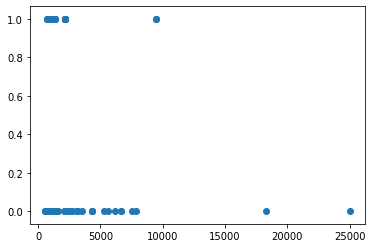

In [0]:
## SVM
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
clf = svm.SVC()
clf.fit(x_train_res,y_train_res)
clf.predict(X_train_res_df)
clf.score(x_train_res,y_train_res)
actual = clf.predict(x_train_res) 
predicted = clf.predict(X_train_res_df) 
results = confusion_matrix(actual, predicted) 
print(clf.predict(X_train_res_df))  
print(clf.score(x_train_res,y_train_res))
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))
print(title)
print('SCATTER PLOT')
plt.scatter(x_train_res.iloc[:,23],y_train_res)
plt.show()